# Bonus: Temperature Analysis II

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
#print(calc_temps('2017-08-01', '2017-08-07'))

In [53]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2016-08-01', '2017-08-27'))

[(58.0, 74.8035413153457, 87.0)]


In [54]:
# Store historical start and end dates in variables
start_date = "2016-08-01"
end_date = "2017-08-27"

triptemps = calc_temps(start_date, end_date)
triptemps

[(58.0, 74.8035413153457, 87.0)]

In [55]:
# Store temp in a variables by slicing the data
tmin = triptemps[0][0]
tavg = triptemps[0][1]
tmax = triptemps[0][2]

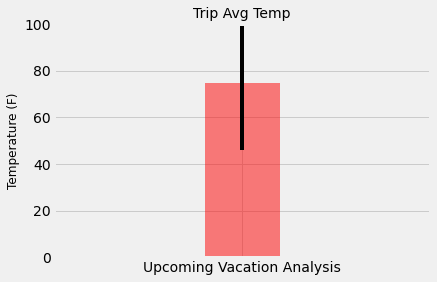

In [56]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x = "Upcoming Vacation Analysis"
yerr = tmax -tmin

plt.bar(x, tavg, yerr=yerr, color="red", alpha=.5)
plt.title("Trip Avg Temp", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=12)
plt.ylim(0,100)
plt.xlim(-2,2)

plt.savefig("Images/vacation_ave_temps.png")
plt.show()

### Daily Rainfall Average

In [57]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

start_date = '2015-08-01'
end_date = '2016-08-27'

query_measure = session.query(Measurement.station, Measurement.prcp, Measurement.date).filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date).all()

query_station =session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date).all()

In [58]:
#Create measure DataFrame
measure_df = pd.DataFrame(query_measure, columns = ['station', 'prcp','date'])

In [59]:
#Create station DataFrame
station_df = pd.DataFrame(query_station, columns = ['station', 'name','latitude', 'longitude', 'elevation'])


In [60]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

merge_df = pd.merge(measure_df, station_df, on="station")
merge_df = merge_df.sort_values("prcp", ascending=False)

merge_df = merge_df.dropna()
merge_df

,station,prcp,date,name,latitude,longitude,elevation
5230325,USC00519281,9.64,2016-07-25,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5229490,USC00519281,9.64,2016-07-25,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5229483,USC00519281,9.64,2016-07-25,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5229484,USC00519281,9.64,2016-07-25,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5229485,USC00519281,9.64,2016-07-25,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
...,...,...,...,...,...,...,...
4854450,USC00519281,0.00,2016-02-27,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4854449,USC00519281,0.00,2016-02-27,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4854448,USC00519281,0.00,2016-02-27,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4854447,USC00519281,0.00,2016-02-27,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


In [61]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
#daily_normals("01-01")

In [72]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)
trip_dates

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06', '2017-08-07'],
              dtype='datetime64[ns]', freq='D')

In [73]:

# Strip off the year and save a list of strings in the format %m-%d
trip_dates2 = trip_dates.strftime("%m-%d")
trip_dates2

Index(['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07'], dtype='object')

In [74]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = []
for date in trip_dates2:
    normals.append(*daily_normals(date))
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [75]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns = ['min', 'avg', 'max'])

In [76]:
# Add the dates to the dataframe and set as index
df["date"] = trip_dates2
df.set_index('date', inplace=True)
df

,min,avg,max
date,,,
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


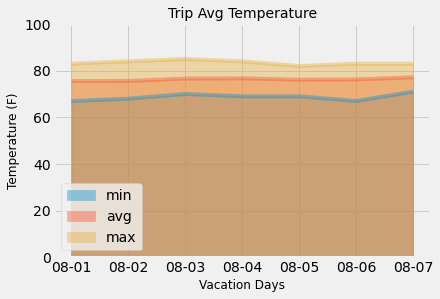

In [77]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind="area", stacked=False, alpha=.4)

plt.title("Trip Avg Temperature", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=12)
plt.xlabel("Vacation Days", fontsize=12)
plt.ylim(0,100)

plt.savefig("Images/vacation_ave_temp.png")
plt.show()



## Close Session

In [78]:
session.close()